## Config

In [3]:
import random as rn
import tensorflow as tf
import numpy as np
import sys
sys.tracebacklimit = None

tf.get_logger().setLevel('ERROR')

def reset_seeds():
    rn.seed(12345)
    tf.set_random_seed(1234)
    np.random.seed(0)

## Data loading & preprocessing

In [4]:
reset_seeds()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout


URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

names = ["name","MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ",
         "Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA",
         "NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"]

parkinson_df = pd.read_csv(URL, names=names)

data = parkinson_df.loc[1:,["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ",
         "Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA",
         "NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE"]].values.astype(np.float)
target = parkinson_df.loc[1:, ['status']].values.astype(np.float)


data = StandardScaler().fit_transform(data)

data_train, data_test, target_train, target_test = \
train_test_split(data, target, test_size=0.3, random_state=545)

## Utils

In [5]:
class Data:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def get_train_data(self):
        return self.X_train, self.y_train

data = Data(data_train, target_train, data_test, target_test)

## Student task 1: 
Learn more about [Dense](https://keras.io/layers/core/) layer, available [activation function](https://keras.io/activations/) and [optimizers](https://keras.io/optimizers/).
Build neural network with more than 4 layers having different activation function in each layer. Train it and visual the results. 

Accuracy Score:  0.864406779661017


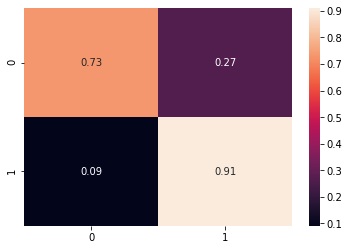

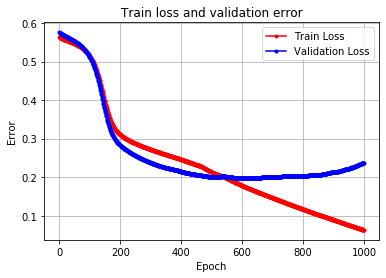

In [6]:
reset_seeds()

import pandas as pd
import seaborn as sn
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, accuracy_score

def task1(data):
    model = Sequential([
        Dense(2, input_shape=(22,), activation="relu"),
        Dense(50, activation="exponential"),
        Dense(50, activation="hard_sigmoid"),
        Dense(50, activation="elu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(SGD(), "binary_crossentropy", metrics=["accuracy"])
    training_info = model.fit(data.X_train, data.y_train, validation_split=0.2, epochs=1000, verbose=False, shuffle=False)

    # display result
    conf_matrix = confusion_matrix(data.y_test, model.predict_classes(data.X_test))
    normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    sn.heatmap(normalized_conf_matrix, fmt='.2f', annot=True)
    print('Accuracy Score: ', accuracy_score(target_test, model.predict_classes(data.X_test)))

    # display training info
    plt.figure(2)
    plt.plot(training_info.history["loss"],'r', marker='.', label="Train Loss")
    plt.plot(training_info.history["val_loss"],'b', marker='.', label="Validation Loss")
    plt.title("Train loss and validation error")
    plt.legend()
    plt.xlabel('Epoch'), plt.ylabel('Error')
    plt.grid()

task1(data)


## Student task 2
Add dropouts to neural network from task 1 and compare the results.

Accuracy Score:  0.864406779661017


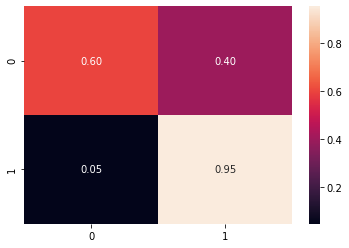

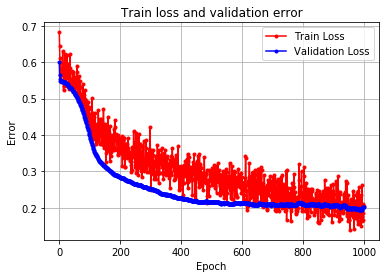

In [7]:
reset_seeds()

import pandas as pd
import seaborn as sn
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, accuracy_score

def task2(data):
    model = Sequential([
        Dense(2, input_shape=(22,), activation="relu"),
        Dense(50, activation="exponential"),
        Dropout(0.25),
        Dense(50, activation="hard_sigmoid"),
        Dropout(0.25),
        Dense(50, activation="elu"),
        Dropout(0.25),
        Dense(1, activation="sigmoid")
    ])
    model.compile(SGD(), "binary_crossentropy", metrics=["accuracy"])
    training_info = model.fit(data.X_train, data.y_train, validation_split=0.2, epochs=1000, verbose=False, shuffle=False)

    # display result
    conf_matrix = confusion_matrix(data.y_test, model.predict_classes(data.X_test))
    normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    sn.heatmap(normalized_conf_matrix, fmt='.2f', annot=True)
    print('Accuracy Score: ', accuracy_score(target_test, model.predict_classes(data.X_test)))

    # display training info
    plt.figure(2)
    plt.plot(training_info.history["loss"],'r', marker='.', label="Train Loss")
    plt.plot(training_info.history["val_loss"],'b', marker='.', label="Validation Loss")
    plt.title("Train loss and validation error")
    plt.legend()
    plt.xlabel('Epoch'), plt.ylabel('Error')
    plt.grid()

task2(data)

## Student task 3
Build __two__ neural network based regression model to predict "Boston housing" price. One without dropouts and one with droputs. Remember to use aprioprate loss function and activation in output layer. Evaluate model and visual learning process. Experiments with different network architecture and optimization parameters. Use data from Keras library. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
DATA INFO
+---------------------------+---------------+
| No. of Features           |  13           |
+---------------------------+---------------+
| No. of Training Samples   | 404           |
+---------------------------+---------------+
| No. of Test Samples       | 102           |
+---------------------------+---------------+
| Avg. SD of Training Set   |  -5.42184e-07 |
+---------------------------+---------------+
| Avg. Mean of Training Set |   2.00711e-16 |
+---------------------------+---------------+

NN INFO
R2 score 0.7107877684875895
hyperparameters
+--------+----+----+----+----+
| layers | 40 | 40 | 40 | 40 |
+--------+----+----+----+----+


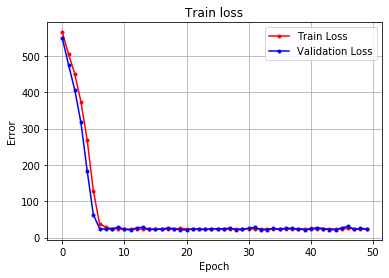


NN INFO
R2 score 0.7138089544801156
hyperparameters
+---------+------+------+
| dropout |  0.5 |  0.5 |
+---------+------+------+
| layers  | 80   | 80   |
+---------+------+------+


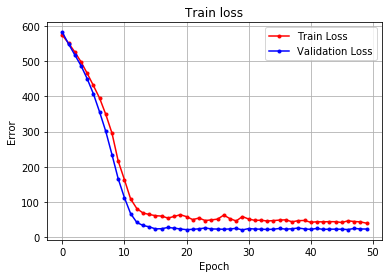

In [14]:
%load_ext autoreload
%autoreload 2

from keras_task03.task import task3

task3()

## Questions
Q: **Why 22 is used as input_shape?**  
A: Training data consists of 22 features.  
  
Q: **What can be oberved form the "Train loss vs Validation error" plot? Why would we might be interested in having longer training phase?**  
A: We can determine when overfitting and underfitting occurs. If validation loss starts increasing it is time to stop. Longer training phase helps identifing the overfitting phase.
   
Q: **What are the benefits of using dropouts?**  
A: NN regularization -> prevents overfitting. Dropouts makes model less dependent on individual neurons.
